In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# 1. Memuat Data
# Membaca file CSV yang berisi data penjualan alpukat
data = pd.read_csv('avocado prices.csv')

In [3]:
# 2. Memeriksa Statistik Data
# Menampilkan informasi dasar tentang dataset
print("\nInformasi Dataset:\n")
data.info()


Informasi Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
# Menampilkan statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:\n")
print(data.describe())


Statistik Deskriptif:

         Unnamed: 0  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      24.232232      1.405978  8.506440e+05  2.930084e+05  2.951546e+05   
std       15.481045      0.402677  3.453545e+06  1.264989e+06  1.204120e+06   
min        0.000000      0.440000  8.456000e+01  0.000000e+00  0.000000e+00   
25%       10.000000      1.100000  1.083858e+04  8.540700e+02  3.008780e+03   
50%       24.000000      1.370000  1.073768e+05  8.645300e+03  2.906102e+04   
75%       38.000000      1.660000  4.329623e+05  1.110202e+05  1.502069e+05   
max       52.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   
std    1.074641e+05  9.8

In [5]:
# 3. Pembersihan Data
# Menghapus kolom yang tidak relevan untuk klasifikasi
# Kolom 'Unnamed: 0' dianggap sebagai indeks tambahan dan dihapus
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])

# Kolom 'Date' juga dihapus karena tidak relevan secara langsung untuk tugas klasifikasi
if 'Date' in data.columns:
    data = data.drop(columns=['Date'])

In [6]:
# Memeriksa nilai yang hilang di setiap kolom
print("\nJumlah nilai yang hilang per kolom:\n")
print(data.isnull().sum())



Jumlah nilai yang hilang per kolom:

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64


C:\Users\L13 YOGA\AppData\Local\Temp\ipykernel_7360\661792018.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=data, palette='viridis')


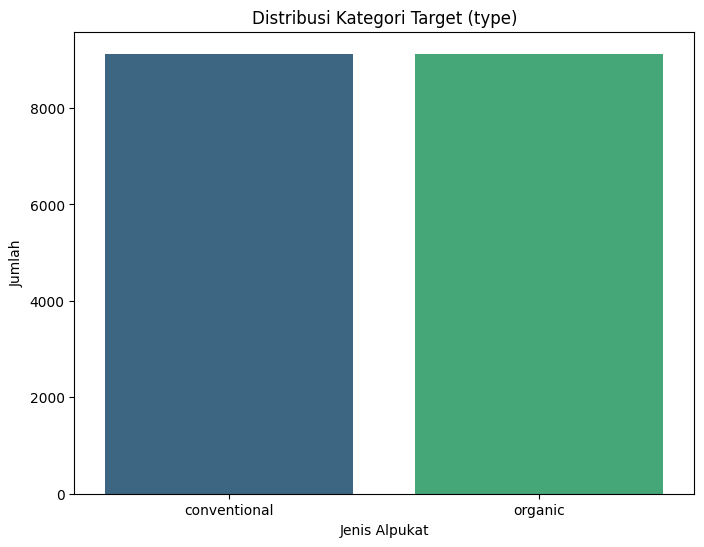

In [7]:
# 4. Visualisasi Distribusi Kolom Target
# Membuat plot untuk melihat distribusi kategori target (kolom 'type')
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=data, palette='viridis')
plt.title('Distribusi Kategori Target (type)')
plt.xlabel('Jenis Alpukat')
plt.ylabel('Jumlah')
plt.show()

In [8]:
# 5. Pra-pemrosesan Data
# Mengubah target (kolom 'type') menjadi label numerik menggunakan LabelEncoder
# 0 untuk "conventional" dan 1 untuk "organic"
le = LabelEncoder()
data['type'] = le.fit_transform(data['type'])

# Melakukan one-hot encoding pada kolom kategorikal 'region'
data = pd.get_dummies(data, columns=['region'], drop_first=True)

# Normalisasi kolom numerik untuk memastikan skala yang seragam
numerical_features = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [9]:
# 6. Membagi Data untuk Pelatihan dan Pengujian
# Memisahkan fitur (X) dan target (y)
X = data.drop(columns=['type'])  # Fitur
y = data['type']  # Target

# Membagi dataset menjadi data latih dan data uji dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Menampilkan jumlah data latih dan uji
print("\nShape Data:\n")
print(f"Data Latih: {X_train.shape}, Data Uji: {X_test.shape}")



Shape Data:

Data Latih: (14599, 63), Data Uji: (3650, 63)


In [11]:
# Menampilkan contoh data setelah pra-pemrosesan
print("\nData siap untuk klasifikasi:\n")
print(X_train.head())



Data siap untuk klasifikasi:

       AveragePrice  Total Volume      4046      4225     4770  Total Bags  \
16391      1.177209     -0.244760 -0.231519 -0.244403 -0.21254   -0.238570   
4990      -1.480083     -0.078771 -0.108676 -0.118035 -0.01225    0.009004   
13653      1.500058     -0.244444 -0.230034 -0.243027 -0.21254   -0.241047   
2074      -0.958558     -0.204142 -0.169819 -0.212934 -0.21129   -0.214035   
12377      0.308002     -0.234580 -0.231507 -0.213006 -0.21254   -0.241269   

       Small Bags  Large Bags  XLarge Bags  year  ...  region_SouthCarolina  \
16391   -0.238346   -0.222707     -0.17558  2017  ...                 False   
4990    -0.050122    0.202433     -0.17558  2016  ...                 False   
13653   -0.241699   -0.222463     -0.17558  2016  ...                 False   
2074    -0.209356   -0.212188     -0.17558  2015  ...                 False   
12377   -0.241905   -0.222734     -0.17558  2016  ...                 False   

       region_SouthCentra